## Импорт библиотек

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

## Загрузка датасета и первичный взгляд

In [182]:
data = pd.read_csv('../titanic.csv')
pd.set_option('display.max_rows', None)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## Краткий анализ Датафрейма

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Статистический анализ числовых колонок

In [184]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
survived,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
age,1046.0,29.881135,14.413500,0.1667,21.0000,28.0000,39.000,80.0000
sibsp,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
parch,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
fare,1308.0,33.295479,51.758668,0.0000,7.8958,14.4542,31.275,512.3292
body,121.0,160.809917,97.696922,1.0000,72.0000,155.0000,256.000,328.0000


## Анализ на наличие пустых значений

In [185]:
print(data.isnull().mean())

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64


По итогу анализа пустых значений, можно сделать следующий вывод: Переменные Cabin-77.4% , Boat-62.8% и Body-90.7% это пустые значения.
Производить замену пустых значений или восстанавливать их как либо не имеет смысла, что в следствии приводит к выводу, что эти переменные можно удалить
из нашего датасета. Так как из-за болоьшого количества пустых данные переменные не влияют на нашу целевую переменную.

## Типы переменных

In [186]:
discrete = [var for var in data.columns if data[var].dtype != 'O' and var != 'survived' and data[var].nunique() < 10]
continuous = [var for var in data.columns if data[var].dtype != 'O' and var != 'survived' and var not in discrete]

mixed = ['cabin']
categorical = [var for var in data.columns if data[var].dtype == 'O' and var not in mixed]

print(f"There are {len(discrete)} descrete variables")
print(f"There are {len(continuous)} continuous variables")
print(f"There are {len(categorical)} categorical variables")
print(f"There are {len(mixed)} mixed variables")

There are 3 descrete variables
There are 3 continuous variables
There are 6 categorical variables
There are 1 mixed variables


In [187]:
discrete

['pclass', 'sibsp', 'parch']

<Axes: >

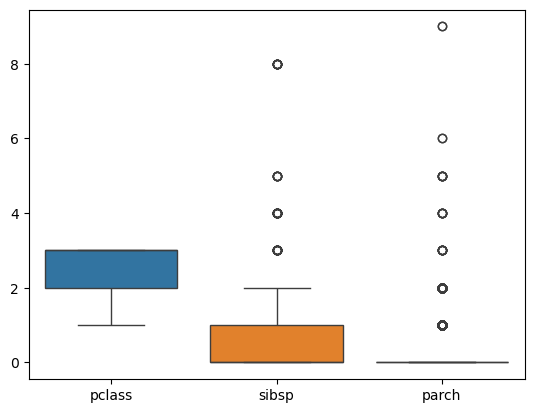

In [188]:
sns.boxplot(data[discrete])

In [189]:
continuous

['age', 'fare', 'body']

<Axes: >

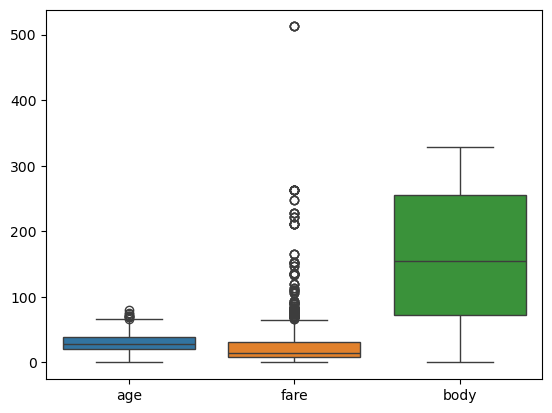

In [190]:
sns.boxplot(data[continuous])

In [191]:
categorical

['name', 'sex', 'ticket', 'embarked', 'boat', 'home.dest']

In [192]:
mixed

['cabin']

#

In [193]:
data['survived'].value_counts()
# построить график

survived
0    809
1    500
Name: count, dtype: int64

В данном наблюдении мы видим, что данная переменная относительно сбалансированная. Баланс умеренный но не критичный.
Но так же можно подметить, что из-за того, что количетсво погибших больше чем выживших, в дальнейшем наша модель может
предсказывать тех кто не выжил с большей точностью

## Замена пустых значений и кодировка категориальных переменных, для отрисовки Корреляционной матрицы

In [194]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoder = ohe.fit_transform(data[['sex']])
tmp = pd.get_dummies(data['sex'], dtype = 'int')
tmp.head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [195]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embarked'].head()
tmp1 = pd.get_dummies(data['embarked'], dtype = int)
tmp1.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [196]:
data['fare'] = data['fare'].fillna(data['fare'].median())

In [197]:
data['age'] = data['age'].fillna(data['age'].mean())
data['age'].isnull().sum()

np.int64(0)

In [198]:
data = data.drop(columns = ['sex', 'embarked', 'name', 'cabin', 'home.dest', 'body', 'boat', 'ticket'])
data = pd.concat([data, tmp, tmp1], axis = 1)
data.head(10)

,pclass,survived,age,sibsp,parch,fare,female,male,C,Q,S
0,1,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,0,2.0000,1,2,151.5500,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,0,1,0,0,1
4,1,0,25.0000,1,2,151.5500,1,0,0,0,1
5,1,1,48.0000,0,0,26.5500,0,1,0,0,1
6,1,1,63.0000,1,0,77.9583,1,0,0,0,1
7,1,0,39.0000,0,0,0.0000,0,1,0,0,1
8,1,1,53.0000,2,0,51.4792,1,0,0,0,1
9,1,0,71.0000,0,0,49.5042,0,1,1,0,0


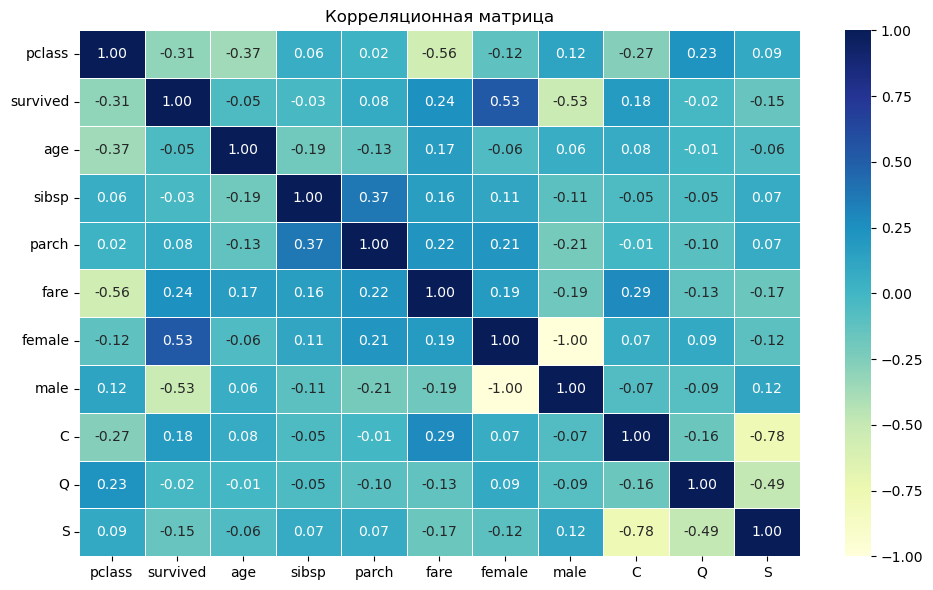

In [199]:
# спустить в самый низ анализа
corr_matrix = data.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

В данном наблюдении мы можем отметить, чтол наибольшую корреляцию имеет переменная 'sex',
А так же переменные 'pclass' и 'embarked' тоже имеют не плохую корреляцию.
Но для болшей информативности и итоговых выводов всё же нужно делать графики для каждой переменной по отношению к 'survived' 

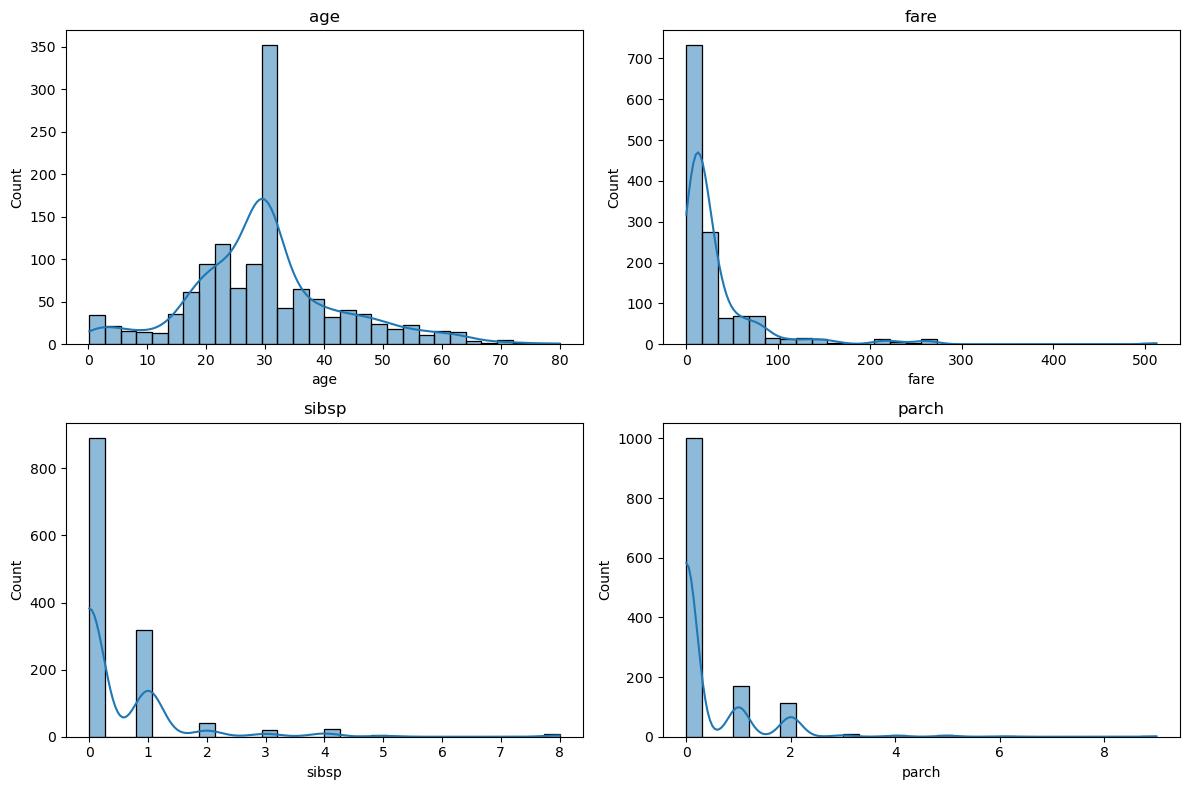

In [200]:
num_features = ['age', 'fare', 'sibsp', 'parch']

plt.figure(figsize = (12, 8))
for idx, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data[feature], kde = True, bins = 30)
    plt.title(f"{feature}")
plt.tight_layout()
plt.show()

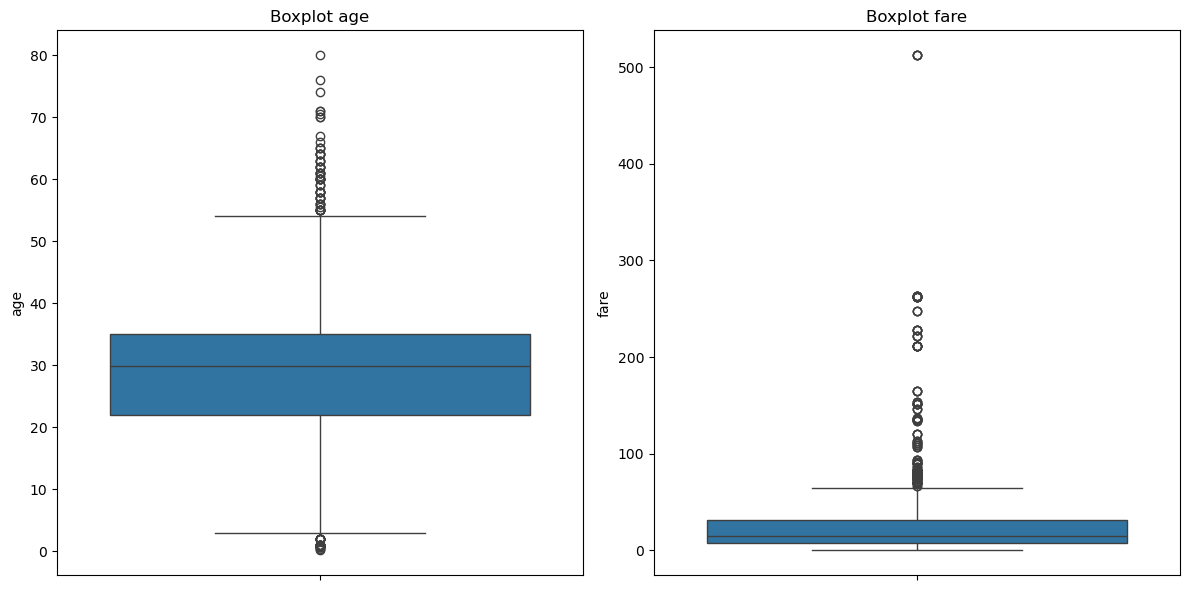

In [201]:
plt.figure(figsize=(12, 6))
for idx, feature in enumerate(['age', 'fare'], 1):
    plt.subplot(1, 2, idx)
    sns.boxplot(y=data[feature])
    plt.title(f"Boxplot {feature}")
plt.tight_layout()
plt.show()

## Embarked & Survived

In [202]:
data_embkd = pd.read_csv("../titanic.csv")
data_embkd

embarked_C = data_embkd[data_embkd['embarked'] == 'C']
embarked_Q = data_embkd[data_embkd['embarked'] == 'Q']
embarked_S = data_embkd[data_embkd['embarked'] == 'S']

In [203]:
embarked_C.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58,C,NaN,NaN,"Montreal, PQ"


In [204]:
embarked_Q.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q,NaN,230.0,"Fond du Lac, WI"
207,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q,14,NaN,"Green Bay, WI"
208,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.00,C78,Q,14,NaN,"Fond du Lac, WI"
469,2,1,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q,10,NaN,"Harrisburg, PA"
470,2,0,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.35,NaN,Q,NaN,NaN,NaN


In [205]:
embarked_S.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [206]:
embarked_combined = pd.concat([embarked_C[['embarked', 'pclass']],
                               embarked_Q[['embarked', 'pclass']],
                               embarked_S[['embarked', 'pclass']]],
                               ignore_index=True)
embarked_combined.head()

,embarked,pclass
0,C,1
1,C,1
2,C,1
3,C,1
4,C,1


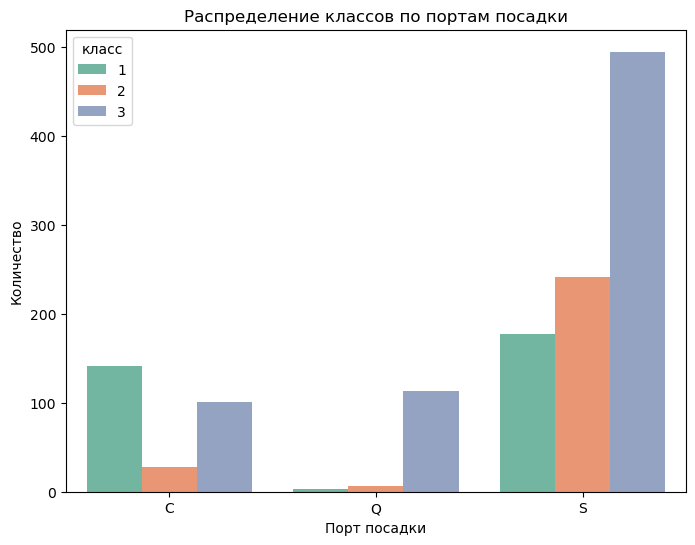

In [207]:
plt.figure(figsize=(8, 6))
sns.countplot(data=embarked_combined, x='embarked', hue='pclass', palette='Set2')

plt.title("Распределение классов по портам посадки")
plt.xlabel("Порт посадки")
plt.ylabel("Количество")
plt.legend(title="класс")
plt.xticks([0, 1, 2], labels=["C", "Q", "S"])

plt.show()

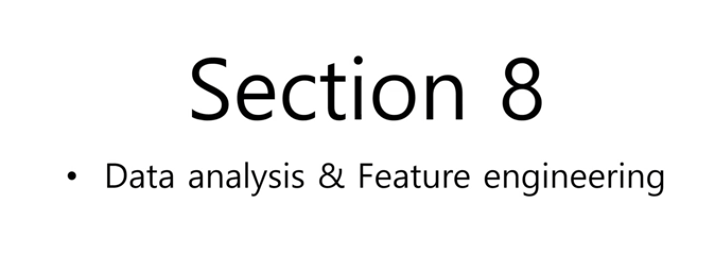

In [208]:
data_embkd.embarked.value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [209]:
data_embkd.groupby('embarked').survived.value_counts()

embarked  survived
C         1           150
          0           120
Q         0            79
          1            44
S         0           610
          1           304
Name: count, dtype: int64

<Axes: xlabel='embarked', ylabel='survived'>

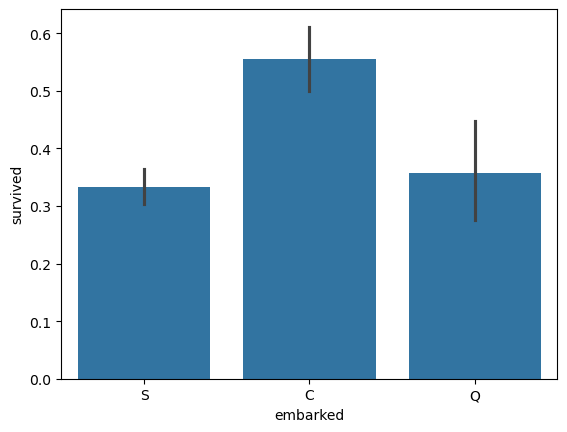

In [210]:
sns.barplot(x = 'embarked', y = 'survived', data = data_embkd)

In [211]:
data_embkd[['embarked', 'survived']].groupby(['embarked'], as_index = False).sum()

,embarked,survived
0,C,150
1,Q,44
2,S,304


### В данном наблюдение можно сделать вывод что больше всего выжило тех кто сел в порту S. Но в процентном соотношении больше выживших тех кто сел в порту С. 

# Pclass & Survived

In [212]:
data = pd.read_csv('../titanic.csv')

In [213]:
data.pclass.value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [214]:
data[['pclass', 'survived']].groupby(['pclass'], as_index = False).sum()

,pclass,survived
0,1,200
1,2,119
2,3,181


<Axes: xlabel='pclass', ylabel='survived'>

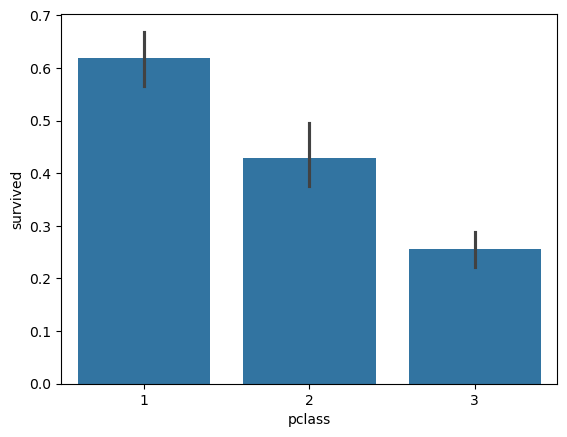

In [215]:
sns.barplot(data = data, x = "pclass", y = "survived")

### В Данном наблюдени мы выидим, что наибольшая выживаемость в первом классе 

# Sex & Survived

In [216]:
data.sex.value_counts()

sex
male      843
female    466
Name: count, dtype: int64

In [217]:
data[['sex', 'survived']].groupby(['sex'], as_index = False).sum()

,sex,survived
0,female,339
1,male,161


<Axes: xlabel='sex', ylabel='survived'>

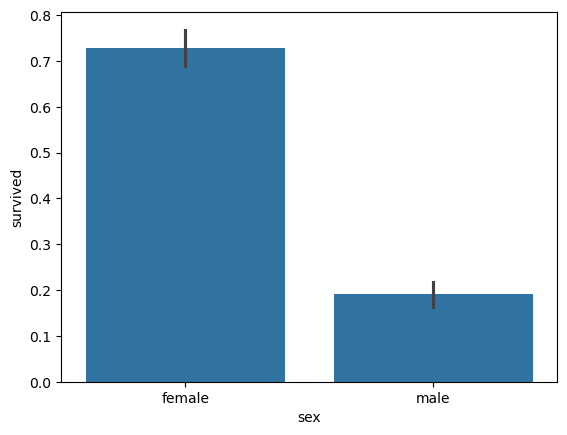

In [218]:
sns.barplot(x = 'sex', y = 'survived', data = data)

### В данном наблюдении мы наглядно видим, что у женщин высокая выживаемость 

# Parch, Sibsp & Survied

In [219]:
# Parch - количество родителей детей путешествующих с пассажиром
data.parch.value_counts()

parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: count, dtype: int64

In [220]:
data[['parch', 'survived']].groupby(['parch'], as_index = False).sum()

,parch,survived
0,0,336
1,1,100
2,2,57
3,3,5
4,4,1
5,5,1
6,6,0
7,9,0


<Axes: xlabel='parch', ylabel='survived'>

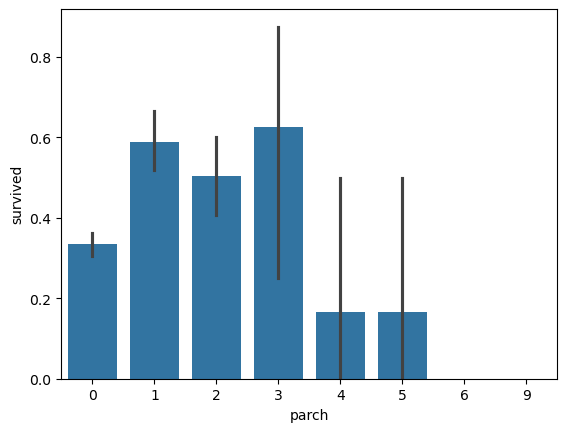

In [221]:
sns.barplot(x = 'parch', y = 'survived', data = data)

In [222]:
# SibSp - Количество братьев/сестер или супругоd
data.sibsp.value_counts()

sibsp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

In [223]:
data[['sibsp', 'survived']].groupby(['sibsp'], as_index = False).sum()

,sibsp,survived
0,0,309
1,1,163
2,2,19
3,3,6
4,4,3
5,5,0
6,8,0


<Axes: xlabel='sibsp', ylabel='survived'>

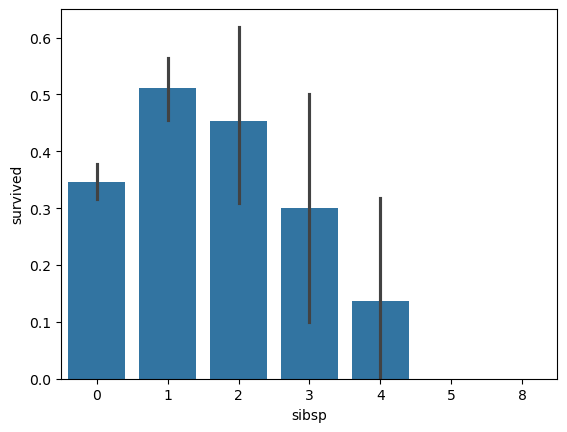

In [224]:
sns.barplot(x = 'sibsp', y = 'survived', data = data)

In [225]:
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['family_size'].head(15)

0     1
1     4
2     4
3     4
4     4
5     1
6     2
7     1
8     3
9     1
10    2
11    2
12    1
13    1
14    1
Name: family_size, dtype: int64

In [226]:
data.family_size.value_counts()#перепроверить

family_size
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [227]:
data[['family_size', 'survived']].groupby(['family_size'], as_index = False).sum()

,family_size,survived
0,1,239
1,2,126
2,3,90
3,4,30
4,5,6
5,6,5
6,7,4
7,8,0
8,11,0


<Axes: xlabel='family_size', ylabel='survived'>

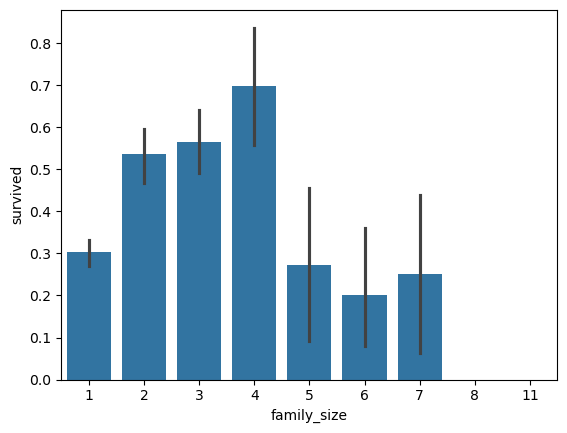

In [228]:
sns.barplot(x = 'family_size', y = 'survived', data = data)

### В данном наблюдении можно сделать вывод, что можно объеденить колонки sibsp & parch, так как эти колонки так или иначе обозначают количество людей у которых есть члены семьи. А так же то, что размер семьи показывает небольшую, но существующую связь с шансами на выживание.

# Name & Survived

In [229]:
data['title'] = data['name'].str.extract(' ([A-Za-z]+)\.')

In [230]:
data.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Mrs
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",1,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2,Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3,Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",1,Mr


In [231]:
pd.crosstab(data['title'], data['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [232]:
data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col', \
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
data['title'] = data['title'].replace('Mlle', 'Miss')
data['title'] = data['title'].replace('Ms', 'Miss')
data['title'] = data['title'].replace('Mme', 'Mrs')
    
data[['title', 'survived']].groupby(['title'], as_index=False).sum()

,title,survived
0,Master,31
1,Miss,179
2,Mr,123
3,Mrs,156
4,Other,11


### В данном наблюдении можно сделать вывод, что данная переменная тесно взаимосвязанна с переменной 'Sex', так как вывод из наблюдения данной переменной можно сделать только один, что так или иначе все сводится к тому, что женщины выживали больше чем мужчины, вне зависимости от положения в обществе. Поэтому, данную переменную можно не использовать для прогнозирования в наших моделях, ведь она прямопропорциональна переменной 'Sex'.

# Age & Survived

In [233]:
data.age.value_counts().head()

age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
Name: count, dtype: int64

In [234]:
data[['age', 'survived']].groupby(['age'], as_index = False).sum().head(25)

,age,survived
0,0.1667,1
1,0.3333,0
2,0.4167,1
3,0.6667,1
4,0.7500,2
5,0.8333,3
6,0.9167,2
7,1.0000,7
8,2.0000,4
9,3.0000,5


In [235]:
age_avg = data['age'].mean()
age_std = data['age'].std()
age_null_count = data['age'].isnull().sum()

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
data.loc[data['age'].isnull(), 'age'] = age_null_random_list
data['age'] = data['age'].astype(int)

data['age_group'] = pd.cut(data['age'], 4)
print(data[['age_group', 'survived']].groupby(['age_group'], as_index = False, observed = False).mean())

       age_group  survived
0  (-0.08, 20.0]  0.421875
1   (20.0, 40.0]  0.362416
2   (40.0, 60.0]  0.410377
3   (60.0, 80.0]  0.250000


<Axes: xlabel='age_group', ylabel='survived'>

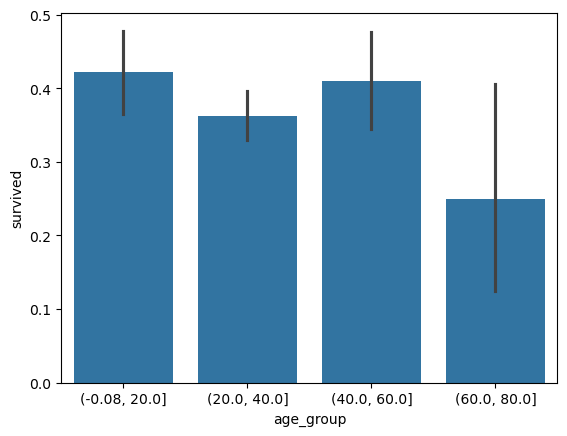

In [236]:
sns.barplot(x = 'age_group', y = 'survived', data = data)

### В данном наблюдении можно сделать вывод, что выживали в основном люди до пожилого возраста.В основном это дети и мы предполагаем, что люди которые были в составе семьи или супругов.

# Cabin & Survived

In [237]:
data.cabin.head()

0     B5
1    C22
2    C22
3    C22
4    C22
Name: cabin, dtype: object

In [238]:
data.cabin.value_counts().head()

cabin
F      8
C23    6
B57    5
G6     5
C22    4
Name: count, dtype: int64

In [239]:
data[['cabin', 'pclass']].groupby(['cabin'], as_index = False).sum().head()

,cabin,pclass
0,A10,1
1,A11,1
2,A14,1
3,A16,1
4,A18,1


In [240]:
pd.crosstab(data['pclass'], ['cabin'])

col_0,cabin
pclass,
1,323
2,277
3,709


In [241]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [242]:
data['letter'] = data['cabin'].str.extract('([A-Za-z]+)')
data['letter'].head()

0    B
1    C
2    C
3    C
4    C
Name: letter, dtype: object

In [243]:
data['letter'].unique()

array(['B', 'C', 'E', 'D', 'A', nan, 'T', 'F', 'G'], dtype=object)

In [244]:
data.fillna({'letter': 'nan'}, inplace=True)
data['letter'].unique()

array(['B', 'C', 'E', 'D', 'A', 'nan', 'T', 'F', 'G'], dtype=object)

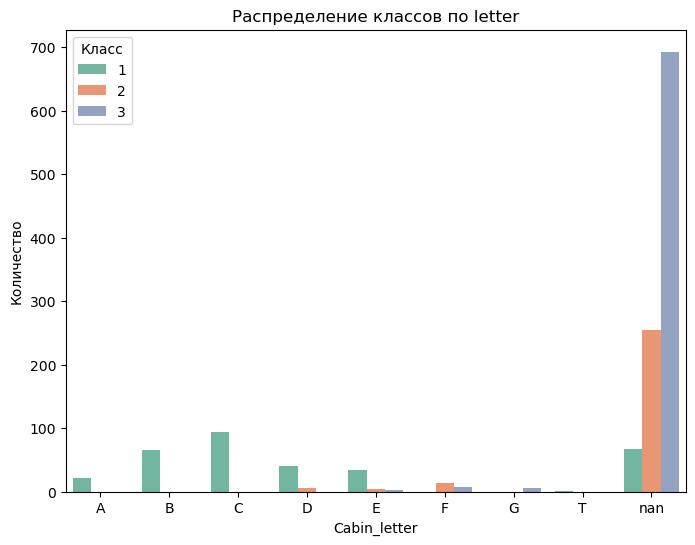

In [245]:
plt.figure(figsize=(8, 6))

order = sorted(data['letter'].unique())
sns.countplot(data=data, x='letter', hue='pclass', palette='Set2', order=order)

plt.title("Распределение классов по letter")
plt.xlabel("Cabin_letter")
plt.ylabel("Количество")
plt.legend(title="Класс")
plt.show()

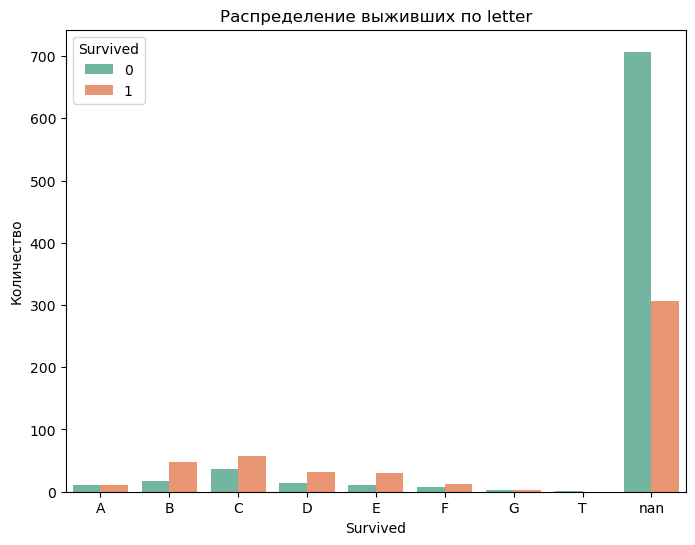

In [246]:
plt.figure(figsize=(8, 6))
order = sorted(data['letter'].unique())
sns.countplot(data=data, x='letter', hue='survived', palette='Set2', order=order)

plt.title("Распределение выживших по letter")
plt.xlabel("Survived")
plt.ylabel("Количество")
plt.legend(title="Survived")
plt.show()

In [247]:
data['cabin_known'] = data['cabin'].notnull().astype(int)

In [248]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title,age_group,letter,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss,"(20.0, 40.0]",B,1
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Master,"(-0.08, 20.0]",C,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Miss,"(-0.08, 20.0]",C,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Mr,"(20.0, 40.0]",C,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Mrs,"(20.0, 40.0]",C,1


In [249]:
data['letter'] = data['letter'].replace({
    'A': 'ABC', 
    'B': 'ABC',
    'C': 'ABC',
    'D': 'DE',
    'E': 'DE',
    'F': 'FG',
    'G': 'FG',
    'T': 'nan'
})

In [250]:
data['letter'].unique()

array(['ABC', 'DE', 'nan', 'FG'], dtype=object)

In [251]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title,age_group,letter,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss,"(20.0, 40.0]",ABC,1
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Master,"(-0.08, 20.0]",ABC,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Miss,"(-0.08, 20.0]",ABC,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Mr,"(20.0, 40.0]",ABC,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Mrs,"(20.0, 40.0]",ABC,1


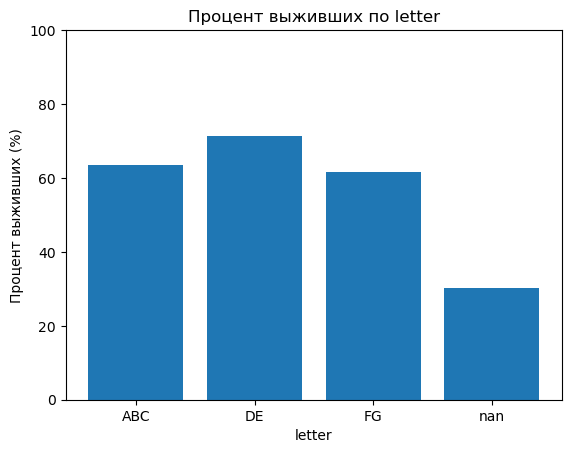

In [252]:
survival_by_letter = data.groupby('letter')['survived'].mean().sort_index() * 100

plt.bar(survival_by_letter.index, survival_by_letter.values)
plt.xlabel('letter')
plt.ylabel('Процент выживших (%)')
plt.title('Процент выживших по letter')
plt.ylim(0, 100) 
plt.show()

In [253]:
cabin_B5 = data[data['cabin'] == 'B5']
cabin_B5

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title,age_group,letter,cabin_known
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,Miss,"(20.0, 40.0]",ABC,1
193,1,1,"Madill, Miss. Georgette Alexandra",female,15,0,1,24160,211.3375,B5,S,2,NaN,"St Louis, MO",2,Miss,"(-0.08, 20.0]",ABC,1


In [254]:
cabin_C22 = data[data['cabin'] == 'C22']
cabin_C22

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title,age_group,letter,cabin_known
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",4,Master,"(-0.08, 20.0]",ABC,1
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Miss,"(-0.08, 20.0]",ABC,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Mr,"(20.0, 40.0]",ABC,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Mrs,"(20.0, 40.0]",ABC,1


In [255]:
cabin_C62 = data[data['cabin'] == 'C62']
cabin_C62

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family_size,title,age_group,letter,cabin_known
10,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.525,C62,C,NaN,124.0,"New York, NY",2,Other,"(40.0, 60.0]",ABC,1
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18,1,0,PC 17757,227.525,C62,C,4,NaN,"New York, NY",2,Mrs,"(-0.08, 20.0]",ABC,1


## В данном наблюдени мы сделали вывод, что шанс на выживаение выше у тех людей у которых был указан номер каюты

# Fare & Survived

In [256]:
data[['fare', 'survived']].groupby(['fare'], as_index = False).sum()

,fare,survived
0,0.0000,2
1,3.1708,1
2,4.0125,0
3,5.0000,0
4,6.2375,0
5,6.4375,0
6,6.4500,0
7,6.4958,0
8,6.7500,0
9,6.8583,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_3276\659019163.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = data.groupby('fare_bin')['survived'].mean()


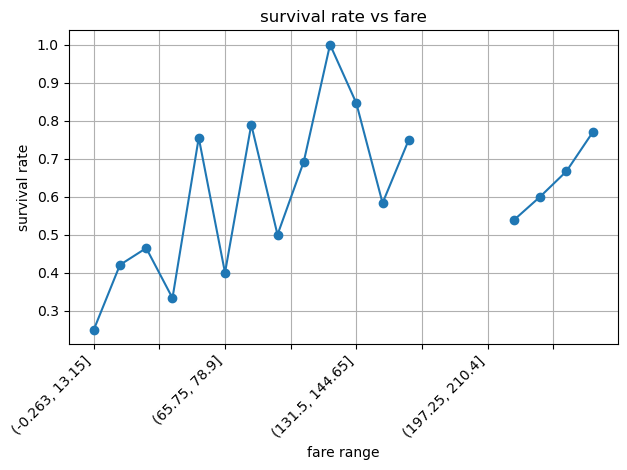

In [257]:
data = data[data['fare'] < 300]

# Разделим цену на группы (биннинг)
data['fare_bin'] = pd.cut(data['fare'], bins=20)

# Посчитаем долю выживших в каждой группе
fare_survival = data.groupby('fare_bin')['survived'].mean()

# Нарисуем график
fare_survival.plot(kind='line', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('survival rate vs fare')
plt.xlabel('fare range')
plt.ylabel('survival rate')
plt.grid()
plt.tight_layout()
plt.show()

In [258]:
data['fare_per_prsn'] = data['fare'] / data['family_size']
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,family_size,title,age_group,letter,cabin_known,fare_bin,fare_per_prsn
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",1,Miss,"(20.0, 40.0]",ABC,1,"(210.4, 223.55]",211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22,...,11,NaN,"Montreal, PQ / Chesterville, ON",4,Master,"(-0.08, 20.0]",ABC,1,"(144.65, 157.8]",37.8875
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.5500,C22,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Miss,"(-0.08, 20.0]",ABC,1,"(144.65, 157.8]",37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.5500,C22,...,NaN,135.0,"Montreal, PQ / Chesterville, ON",4,Mr,"(20.0, 40.0]",ABC,1,"(144.65, 157.8]",37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.5500,C22,...,NaN,NaN,"Montreal, PQ / Chesterville, ON",4,Mrs,"(20.0, 40.0]",ABC,1,"(144.65, 157.8]",37.8875


C:\Users\Admin\AppData\Local\Temp\ipykernel_3276\1036745384.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = data.groupby('fare_bin')['survived'].mean()


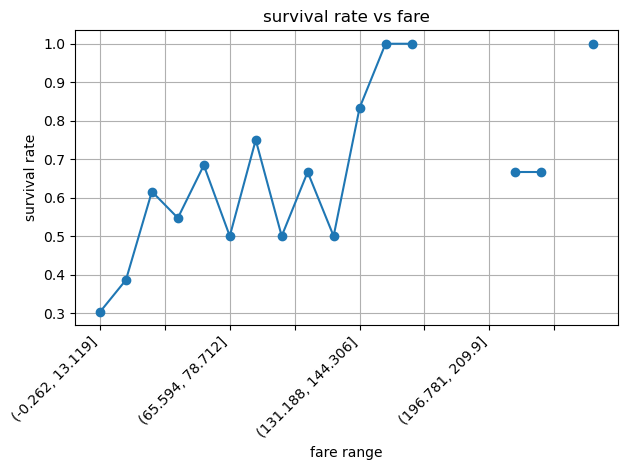

In [259]:
data = data[data['fare_per_prsn'] < 300]

# Разделим цену на группы (биннинг)
data['fare_bin'] = pd.cut(data['fare_per_prsn'], bins=20)

# Посчитаем долю выживших в каждой группе
fare_survival = data.groupby('fare_bin')['survived'].mean()

# Нарисуем график
fare_survival.plot(kind='line', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('survival rate vs fare')
plt.xlabel('fare range')
plt.ylabel('survival rate')
plt.grid()
plt.tight_layout()
plt.show()

## В оплате был замечен один момент. В датасете цена указана не за одного человека, а за каюту. А так как цена билета дает больше шанс на выживание, был сделан вывод вывести цену на билет для каждого человека, чтобы шанс на предсказание выживания был примерно более точным, на основе с ценой для билета. 

# Примерный итог

In [260]:
cols = [
    'survived',
    'pclass',
    'parch',
    'sibsp',
    'sex',
    'age',
    'cabin',
    'fare',
    'embarked'
]

data = pd.read_csv('../titanic.csv', usecols=cols)
pd.set_option('display.max_rows', None)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [261]:
ohe = OneHotEncoder(handle_unknown='ignore')
encoder = ohe.fit_transform(data[['sex']])
sex_tmp = pd.get_dummies(data['sex'], dtype = 'int')
tmp.head()

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [262]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embarked'].head()
embarked_tmp = pd.get_dummies(data['embarked'], dtype = int)
embarked_tmp.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [263]:
data['family_size'] = data['sibsp'] + data['parch'] + 1
data['family_size'].head(15)

0     1
1     4
2     4
3     4
4     4
5     1
6     2
7     1
8     3
9     1
10    2
11    2
12    1
13    1
14    1
Name: family_size, dtype: int64

In [264]:
age_avg = data['age'].mean()
age_std = data['age'].std()
age_null_count = data['age'].isnull().sum()

age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
data.loc[data['age'].isnull(), 'age'] = age_null_random_list
data['age'] = data['age'].astype(int)

data['age_group'] = pd.cut(data['age'], 4)
print(data[['age_group', 'survived']].groupby(['age_group'], as_index = False, observed = False).mean())

       age_group  survived
0  (-0.08, 20.0]  0.435216
1   (20.0, 40.0]  0.367292
2   (40.0, 60.0]  0.378261
3   (60.0, 80.0]  0.250000


In [265]:
data['cabin_known'] = data['cabin'].notnull().astype(int)

In [266]:
data['fare_per_prsn'] = data['fare'] / data['family_size']
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,family_size,age_group,cabin_known,fare_per_prsn
0,1,1,female,29,0,0,211.3375,B5,S,1,"(20.0, 40.0]",1,211.3375
1,1,1,male,0,1,2,151.5500,C22,S,4,"(-0.08, 20.0]",1,37.8875
2,1,0,female,2,1,2,151.5500,C22,S,4,"(-0.08, 20.0]",1,37.8875
3,1,0,male,30,1,2,151.5500,C22,S,4,"(20.0, 40.0]",1,37.8875
4,1,0,female,25,1,2,151.5500,C22,S,4,"(20.0, 40.0]",1,37.8875


In [267]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,family_size,age_group,cabin_known,fare_per_prsn
0,1,1,female,29,0,0,211.3375,B5,S,1,"(20.0, 40.0]",1,211.3375
1,1,1,male,0,1,2,151.5500,C22,S,4,"(-0.08, 20.0]",1,37.8875
2,1,0,female,2,1,2,151.5500,C22,S,4,"(-0.08, 20.0]",1,37.8875
3,1,0,male,30,1,2,151.5500,C22,S,4,"(20.0, 40.0]",1,37.8875
4,1,0,female,25,1,2,151.5500,C22,S,4,"(20.0, 40.0]",1,37.8875


In [268]:
data = data.drop(columns = ['fare', 'sibsp', 'parch', 'cabin', 'age', 'sex', 'embarked'])
data = pd.concat([data, sex_tmp, embarked_tmp], axis = 1)
data.head()

,pclass,survived,family_size,age_group,cabin_known,fare_per_prsn,female,male,C,Q,S
0,1,1,1,"(20.0, 40.0]",1,211.3375,1,0,0,0,1
1,1,1,4,"(-0.08, 20.0]",1,37.8875,0,1,0,0,1
2,1,0,4,"(-0.08, 20.0]",1,37.8875,1,0,0,0,1
3,1,0,4,"(20.0, 40.0]",1,37.8875,0,1,0,0,1
4,1,0,4,"(20.0, 40.0]",1,37.8875,1,0,0,0,1
